In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
# try !pip install keras if keras not found

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


## Classifying Digits Using PCA and the MNIST data

We will use PCA to perform dimensionality reduction on the MNIST handwritten digit data.  We explore the *eigenvectors* and further show how the decomposition can be used to capture the salient dimensions of the data necessary to classify the digits.

#### Load the Data, Examine and Explore

In [2]:
## Load in the MNIST data
(trainX, trainy), (testX, testy) = mnist.load_data()

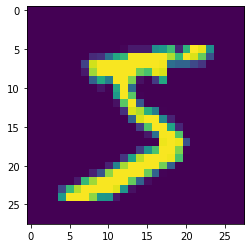

In [3]:
## lets explore what these images look like
plt.imshow(trainX[0])

In [4]:
# let's reshape the data so that the pixel values are 784 distinct columns

X_train = trainX.reshape(60000,28*28)
X_test = testX.reshape(10000,28*28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
# choose a digit to represent our positive outcome
outcome_digit = 5
y_train_bin = (trainy==outcome_digit).astype(int)
y_test_bin = (testy==outcome_digit).astype(int)

In [6]:
s = StandardScaler()
X_train_std = s.fit_transform(X_train)
X_test_std = s.transform(X_test)

In [7]:
pca_proc = PCA(n_components=20)

In [8]:
pca_proc.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
X_train_pca = pca_proc.transform(X_train_std)
X_test_pca = pca_proc.transform(X_test_std)

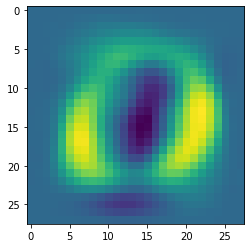

In [10]:
## Display the ith eigenvectors
i=0
plt.imshow(pca_proc.components_[i].reshape(28,28))

In [11]:
rf1 = RandomForestClassifier(n_estimators=500)

In [12]:
rf1.fit(X_train_pca, y_train_bin)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
test_probs = rf1.predict_proba(X_test_pca)[:,1]

In [14]:
roc_auc_score(y_test_bin, test_probs)

0.9956044407813759

## Math behind PCA
All the PCA object really does is a couple of linear algebra operations:

1. Create the variance/covariance matrix
2. Perform an eigenvalue/eigenvector decomposition


In [15]:
X_train_cov = (X_train_std.T.dot(X_train_std))/(X_train_std.shape[0])
eigvals, eigvecs = np.linalg.eig(X_train_cov)

In [16]:
eigvals[:15], pca_proc.explained_variance_[:15]

(array([40.48696031, 29.24121016, 26.81135762, 20.68627344, 18.07634885,
        15.73291565, 13.79037925, 12.51738047, 11.00661182, 10.05032954,
         9.62029745,  8.63082971,  7.99146367,  7.8147519 ,  7.37541493]),
 array([40.48763511, 29.24169752, 26.81180449, 20.68661822, 18.07665009,
        15.73317778, 13.79060889, 12.51758776, 11.00678151, 10.05046422,
         9.62038132,  8.63068371,  7.99002546,  7.8144419 ,  7.37372259]))

In [17]:
np.allclose(eigvals[:15], pca_proc.explained_variance_[:15], rtol=.001)

True

In [18]:
np.allclose(eigvecs[:,1], pca_proc.components_[1], rtol=.001)

True

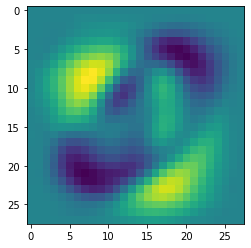

In [19]:
plt.imshow(eigvecs[:,1].reshape(28,28))

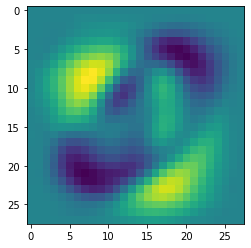

In [20]:
plt.imshow(pca_proc.components_[1].reshape(28,28))